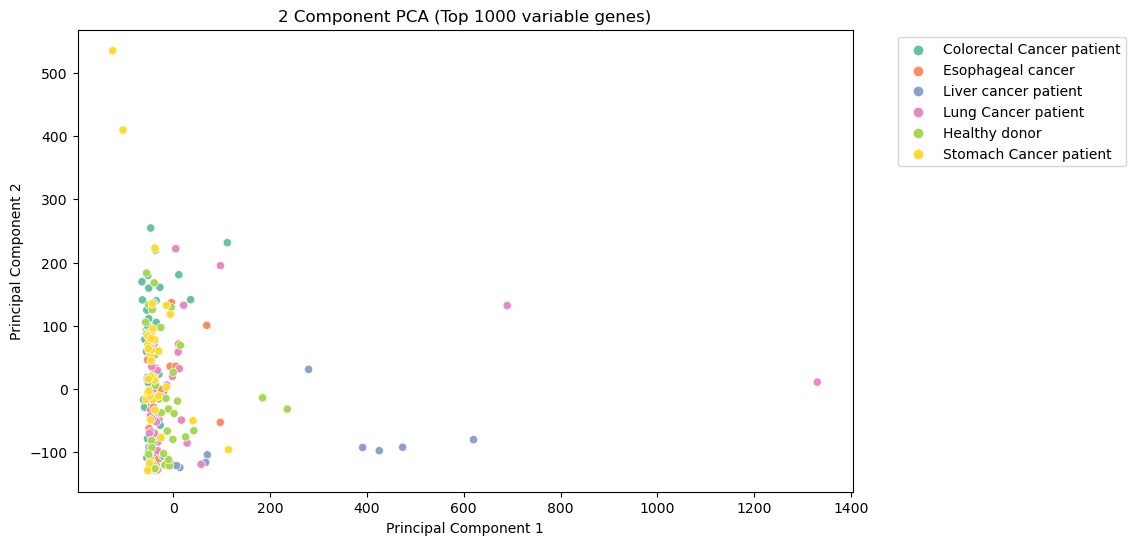

In [14]:
import pandas as pd

extended_acronym_mapping = {
    **acronym_mapping,
    "ESCA_KZ": "Esophageal cancer",
    "ESCA_PKU": "Esophageal cancer",
    "ESCA_569608": "Esophageal cancer",
    "ESCA_569799": "Esophageal cancer",
    "ESCA_UnionH": "Esophageal cancer",
    "ESCA_XieH": "Esophageal cancer",
    "NC_ChQ": "Healthy donor",
    "NC_HaiB": "Healthy donor",
    "NC_PKU": "Healthy donor",
    "NC_ShH": "Healthy donor"
}

# Load the data
data = pd.read_csv('GSE174302_all-reads-available-samples.txt', sep='\t', index_col=0)

# Display the first few rows of the data for a quick overview
data.head()
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.transpose())

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)

# Convert the PCA results to a DataFrame
pca_results = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'], index=data.columns)

# Extract acronyms from sample names using the updated format
sample_types_extended = data.columns.str.split('-').str[0].map(extended_acronym_mapping)

# Update the PCA results DataFrame with the new sample type information
pca_results['sample_type'] = sample_types_extended

# Plot PCA results with colors based on updated sample type for the subset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='sample_type', data=pca_results, palette='Set2')
plt.title('2 Component PCA (Top 1000 variable genes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

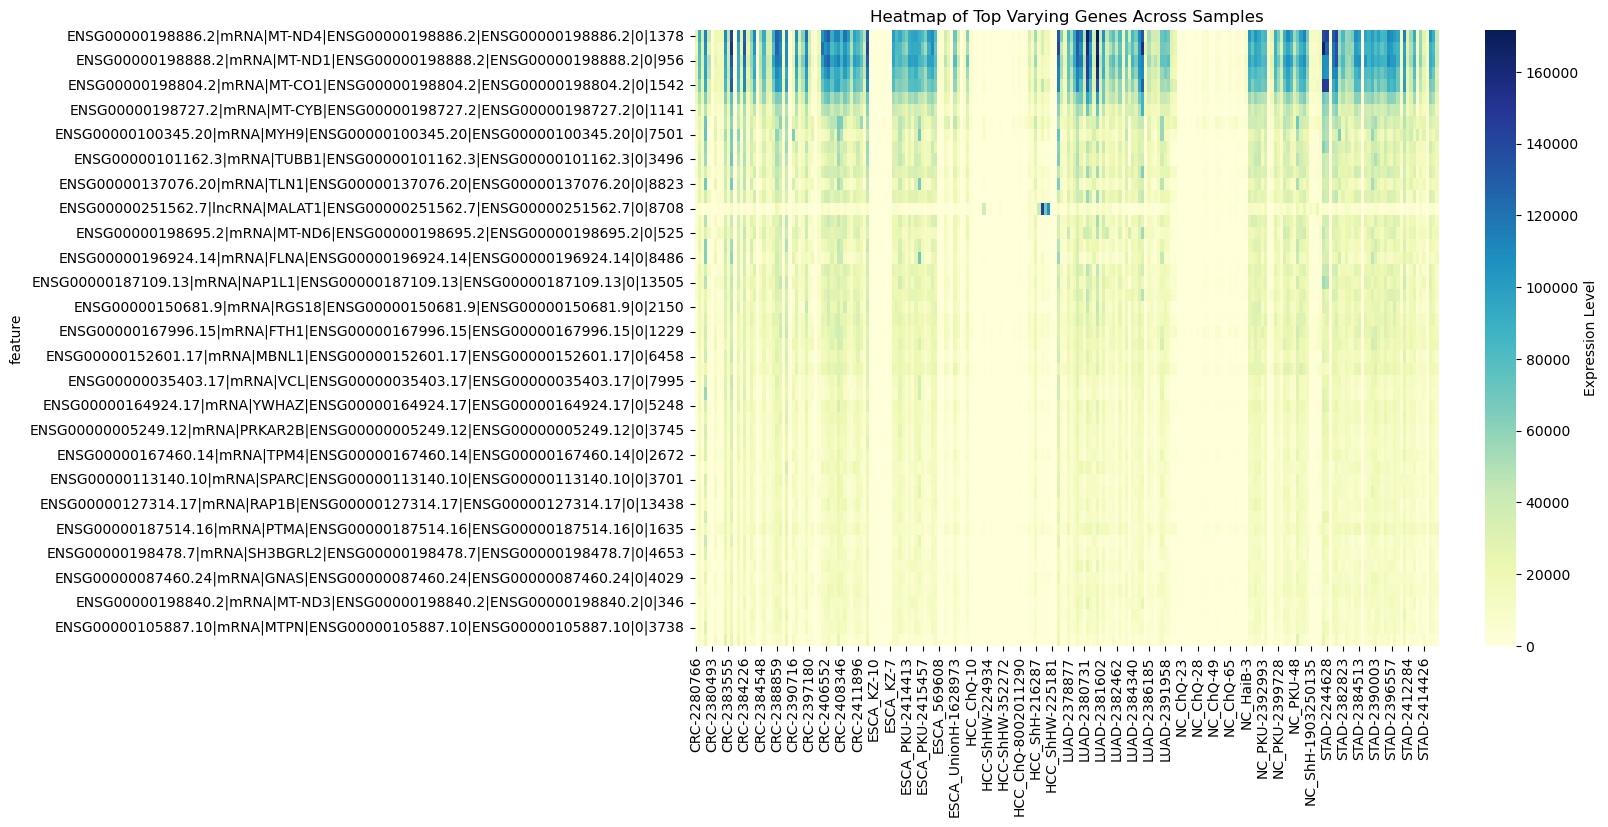

In [3]:
# Selecting the top 50 genes based on variance for the heatmap
top_genes = data.var(axis=1).nlargest(50).index
heatmap_data = data.loc[top_genes]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Expression Level'})
plt.title('Heatmap of Top Varying Genes Across Samples')
plt.show()


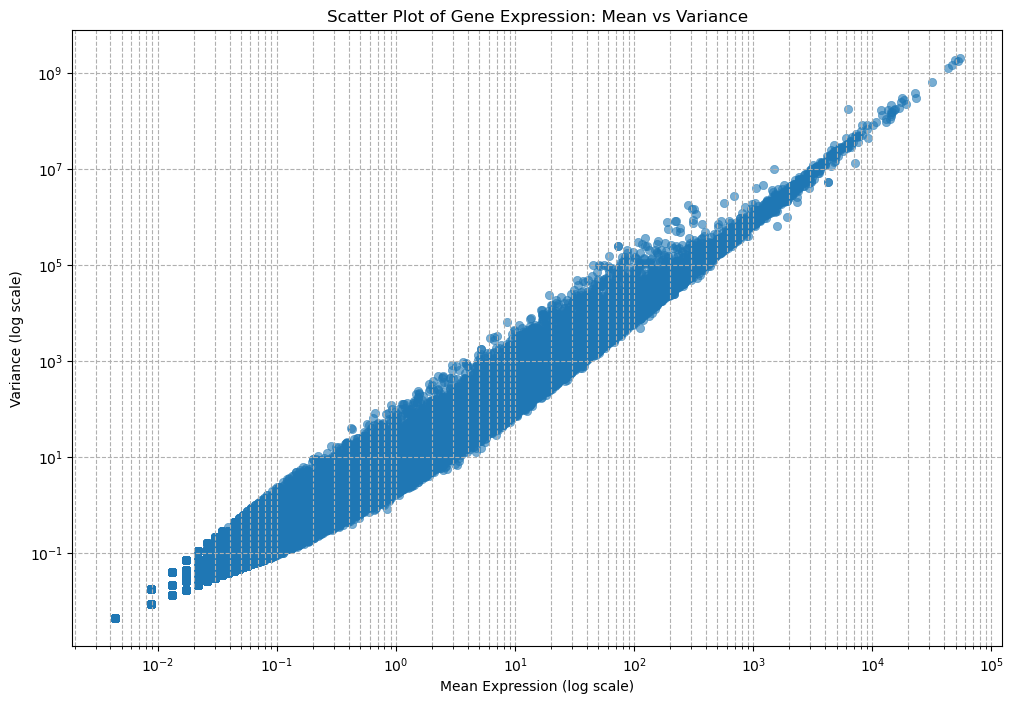

In [6]:
df = pd.read_csv('GSE174302_all-reads-available-samples.txt', sep='\t', index_col=0)

# Calculate mean and variance for each gene
gene_means = df.mean(axis=1)
gene_variances = df.var(axis=1)

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=gene_means, y=gene_variances, alpha=0.6, edgecolor=None)
plt.yscale('log')
plt.xscale('log')
plt.title('Scatter Plot of Gene Expression: Mean vs Variance')
plt.xlabel('Mean Expression (log scale)')
plt.ylabel('Variance (log scale)')
plt.grid(True, which="both", ls="--")
plt.show()


In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('GSE174302_all-reads-available-samples.txt', sep='\t', index_col=0)

# 1. PCA Plot Insights
# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.transpose())

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)

# Proportion of variance explained by the first two principal components
explained_variance = pca.explained_variance_ratio_

# Count of samples in each quadrant of the PCA plot
quadrant_counts = {
    "Q1": sum((principal_components[:, 0] > 0) & (principal_components[:, 1] > 0)),
    "Q2": sum((principal_components[:, 0] < 0) & (principal_components[:, 1] > 0)),
    "Q3": sum((principal_components[:, 0] < 0) & (principal_components[:, 1] < 0)),
    "Q4": sum((principal_components[:, 0] > 0) & (principal_components[:, 1] < 0))
}

# 2. Heatmap Insights
heatmap_summary = data.describe()

# 3. Scatter Plot of Gene Expression (Mean vs Variance) Insights
# Calculate mean and variance for each gene
gene_means = data.mean(axis=1)
gene_variances = data.var(axis=1)

highest_mean_gene = gene_means.idxmax()
lowest_mean_gene = gene_means.idxmin()
highest_variance_gene = gene_variances.idxmax()
lowest_variance_gene = gene_variances.idxmin()

# Printing the results
print("PCA Insights:")
print(f"Variance explained by PC1: {explained_variance[0]:.2%}")
print(f"Variance explained by PC2: {explained_variance[1]:.2%}")
print("Sample counts in each PCA quadrant:", quadrant_counts)
print("\nHeatmap Insights:")
print("Summary statistics for the gene expression data:\n", heatmap_summary)
print("\nScatter Plot Insights:")
print(f"Gene with highest mean expression: {highest_mean_gene}")
print(f"Gene with lowest mean expression: {lowest_mean_gene}")
print(f"Gene with highest variance: {highest_variance_gene}")
print(f"Gene with lowest variance: {lowest_variance_gene}")



PCA Insights:
Variance explained by PC1: 14.59%
Variance explained by PC2: 9.19%
Sample counts in each PCA quadrant: {'Q1': 20, 'Q2': 81, 'Q3': 103, 'Q4': 26}

Heatmap Insights:
Summary statistics for the gene expression data:
          CRC-2280766    CRC-2327118    CRC-2334660    CRC-2362297  \
count  139343.000000  139343.000000  139343.000000  139343.000000   
mean       11.029474      31.703458      12.357958      59.865899   
std       205.193195     631.675722     259.170599    1058.654597   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     29677.000000   89277.000000   38917.000000  113781.000000   

         CRC-2372270    CRC-2380493    CRC-2382513    CRC-2383018  \
count  139343.000000  139343.000000  139343.000000  139343.000000   
mean        